In [20]:
import pandas as pnd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

tf.config.set_visible_devices([], 'GPU')

LONGUEUR_IMAGE = 28
LARGEUR_IMAGE = 28

observations_entrainement = pnd.read_csv('datas/fashion-mnist_train.csv')

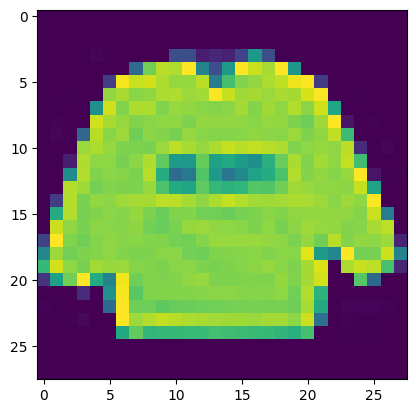

In [21]:
X = np.array(observations_entrainement.iloc[:, 1:])

premiereImage = X[0]
premiereImage = premiereImage.reshape([LONGUEUR_IMAGE, LARGEUR_IMAGE])
plt.imshow(premiereImage)
plt.show()

In [22]:
y = keras.utils.to_categorical(np.array(observations_entrainement.iloc[:, 0]))

X_apprentissage, X_validation, y_apprentissage, y_validation = train_test_split(X, y, test_size=0.2, random_state=13)

In [23]:
X_apprentissage = X_apprentissage.reshape(X_apprentissage.shape[0], LARGEUR_IMAGE, LONGUEUR_IMAGE, 1)
X_apprentissage = X_apprentissage.astype('float32')
X_apprentissage /= 255

X_validation = X_validation.reshape(X_validation.shape[0], LARGEUR_IMAGE, LONGUEUR_IMAGE, 1)
X_validation = X_validation.astype('float32')
X_validation /= 255

In [24]:
observations_test = pnd.read_csv('datas/fashion-mnist_test.csv')
X_test = np.array(observations_test.iloc[:, 1:])
y_test = tf.keras.utils.to_categorical(np.array(observations_test.iloc[:, 0]))
X_test = X_test.reshape(X_test.shape[0], LARGEUR_IMAGE, LONGUEUR_IMAGE, 1)
X_test = X_test.astype('float32')
X_test /= 255

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D

dimentionImage = (LARGEUR_IMAGE, LONGUEUR_IMAGE, 1)

reseauNeurone1Convolution = Sequential()

reseauNeurone1Convolution.add(Input(shape=dimentionImage))

reseauNeurone1Convolution.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

reseauNeurone1Convolution.add(MaxPooling2D(pool_size=(2,2)))

reseauNeurone1Convolution.add(Dropout(0.2))

reseauNeurone1Convolution.add(Flatten())

reseauNeurone1Convolution.add(Dense(128, activation='relu'))

reseauNeurone1Convolution.add(Dense(10, activation='softmax'))

In [26]:
reseauNeurone1Convolution.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [27]:
historique_apprentissage = reseauNeurone1Convolution.fit(X_apprentissage, y_apprentissage, batch_size=256, epochs=10, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8122 - loss: 0.5407 - val_accuracy: 0.8608 - val_loss: 0.3980
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8736 - loss: 0.3567 - val_accuracy: 0.8620 - val_loss: 0.3906
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8888 - loss: 0.3147 - val_accuracy: 0.8856 - val_loss: 0.3247
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8994 - loss: 0.2864 - val_accuracy: 0.8917 - val_loss: 0.2999
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9059 - loss: 0.2638 - val_accuracy: 0.8951 - val_loss: 0.2901
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9124 - loss: 0.2490 - val_accuracy: 0.8991 - val_loss: 0.2860
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9153 - loss: 0.2352 - val_accuracy: 0.8957 - val_loss: 0.2845
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9196 - loss: 0.2236 - val_accu

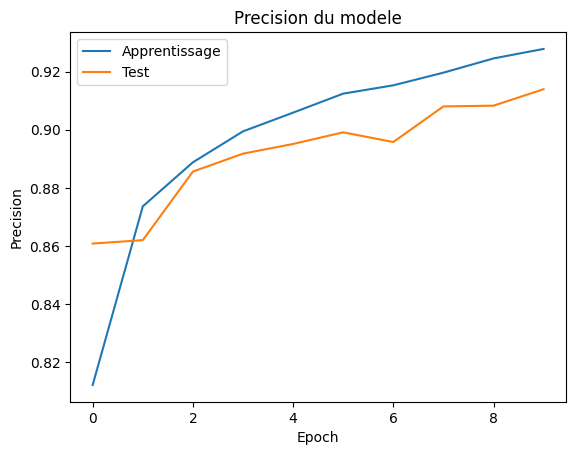

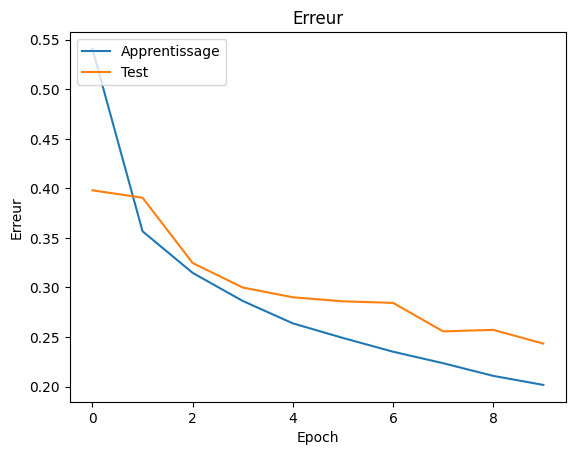

In [28]:
plt.plot(historique_apprentissage.history['accuracy'])
plt.plot(historique_apprentissage.history['val_accuracy'])
plt.title('Precision du modele')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()

plt.plot(historique_apprentissage.history['loss'])
plt.plot(historique_apprentissage.history['val_loss'])
plt.title('Erreur')
plt.ylabel('Erreur')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generateur_images = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08, zoom_range=0.08)

In [30]:
nouvelles_images_apprentissage = generateur_images.flow(X_apprentissage, y_apprentissage, batch_size=256)

nouvelles_images_validation = generateur_images.flow(X_validation, y_validation, batch_size=256)

historique_apprentissage = reseauNeurone1Convolution.fit(nouvelles_images_apprentissage, steps_per_epoch=48000//256, verbose=1)

evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)

print('Erreur :', evaluation[0])
print('Precision :', evaluation[1])

187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.8275 - loss: 0.4633
Erreur : 0.26409628987312317
Precision : 0.9067000150680542


In [31]:
model_json = reseauNeurone1Convolution.to_json()
with open("modele/modele.json", "w") as json_file:
    json_file.write(model_json)

reseauNeurone1Convolution.save_weights("modele/modele.weights.h5")
print("Modele sauvegarde!")

Modele sauvegarde!


In [32]:
from keras.layers import BatchNormalization

reseauNeurone4Convolution = Sequential()

reseauNeurone4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=dimentionImage))
reseauNeurone4Convolution.add(BatchNormalization())
reseauNeurone4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
reseauNeurone4Convolution.add(BatchNormalization())
reseauNeurone4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurone4Convolution.add(Dropout(0.25))

reseauNeurone4Convolution.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
reseauNeurone4Convolution.add(BatchNormalization())
reseauNeurone4Convolution.add(Dropout(0.25))

reseauNeurone4Convolution.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
reseauNeurone4Convolution.add(BatchNormalization())
reseauNeurone4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurone4Convolution.add(Dropout(0.25))

reseauNeurone4Convolution.add(Flatten())
reseauNeurone4Convolution.add(Dense(512, activation='relu'))
reseauNeurone4Convolution.add(BatchNormalization())
reseauNeurone4Convolution.add(Dropout(0.5))

reseauNeurone4Convolution.add(Dense(128, activation='relu'))
reseauNeurone4Convolution.add(BatchNormalization())
reseauNeurone4Convolution.add(Dropout(0.5))

reseauNeurone4Convolution.add(Dense(10, activation='softmax'))

/home/vscode/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
reseauNeurone4Convolution.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

historique_apprentissage = reseauNeurone4Convolution.fit(X_apprentissage, y_apprentissage, batch_size=256, epochs=10, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.7394 - loss: 0.7587 - val_accuracy: 0.1136 - val_loss: 3.4909
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - accuracy: 0.8389 - loss: 0.4498 - val_accuracy: 0.3547 - val_loss: 2.4671
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.8676 - loss: 0.3718 - val_accuracy: 0.7727 - val_loss: 0.6771
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 103ms/step - accuracy: 0.8818 - loss: 0.3369 - val_accuracy: 0.8522 - val_loss: 0.4106
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.8895 - loss: 0.3054 - val_accuracy: 0.8989 - val_loss: 0.2767
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 103ms/step - accuracy: 0.8976 - loss: 0.2877 - val_accuracy: 0.8873 - val_loss: 0.3031
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9005 - loss: 0.2751 - val_accuracy: 0.8918 - val_loss: 0.2939
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 103ms/step - accuracy: 0.9072 - loss: 0.263

In [34]:
evaluation = reseauNeurone4Convolution.evaluate(X_test, y_test, verbose=0)

print('Erreur :', evaluation[0])
print('Precision :', evaluation[1])

Erreur : 0.2434578686952591
Precision : 0.9132999777793884


In [38]:
historique_apprentissage = reseauNeurone4Convolution.fit(nouvelles_images_apprentissage, steps_per_epoch=48000//256, epochs=50, validation_data=nouvelles_images_validation, validation_steps=12000//256, verbose=1 )

evaluation = reseauNeurone4Convolution.evaluate(X_test, y_test, verbose=0)

print('Erreur :', evaluation[0])
print('Précision:', evaluation[1])

Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 19s 103ms/step - accuracy: 0.9085 - loss: 0.2534 - val_accuracy: 0.9130 - val_loss: 0.2422
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9062 - loss: 0.2670 - val_accuracy: 0.9114 - val_loss: 0.2408
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.9087 - loss: 0.2518 - val_accuracy: 0.9133 - val_loss: 0.2328
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8984 - loss: 0.2768 - val_accuracy: 0.9096 - val_loss: 0.2421
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - accuracy: 0.9088 - loss: 0.2536 - val_accuracy: 0.9160 - val_loss: 0.2241
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9336 - loss: 0.2331 - val_accuracy: 0.9157 - val_loss: 0.2278
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.9101 - loss: 0.2467 - val_accuracy: 0.9142 - val_loss: 0.2331
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9141 - loss: 0.2157 - val_ac

In [39]:
fichier_json = open('modele/modele.json', 'r')
modele_json = fichier_json.read()
fichier_json.close()

from keras.models import model_from_json
modele = model_from_json(modele_json)

modele.load_weights("modele/modele.weights.h5")

In [40]:
classes = ["Un T-shirt/haut",
           "Un pantalon",
           "Un pull", 
           "Une robe",
           "Un manteau",
           "Des sandales",
           "Une chemise",
           "Des baskets", 
           "Un sac",
           "Des bottes de cheville"]

In [48]:
import numpy as np
from PIL import Image, ImageFilter

def load_and_preprocess_image(image_path, target_size=28, content_size=20):
    image = Image.open(image_path).convert('L')
    resized_img = resize_with_aspect_ratio(image, content_size)
    canvas = create_centered_image(resized_img, target_size)
    normalized_array = normalize_pixels(canvas)

    return normalized_array.reshape(1, target_size, target_size, 1)

def resize_with_aspect_ratio(image, target_dimension):
    width, height = image.size

    if width > height:
        new_width = target_dimension
        new_height = max(1, round(target_dimension * height / width))
    else:
        new_height = target_dimension
        new_width = max(1, round(target_dimension * width / height))

    return image.resize((new_width, new_height), Image.LANCZOS).filter(ImageFilter.SHARPEN)

def create_centered_image(image, canvas_size):
    canvas = Image.new('L', (canvas_size, canvas_size), 255)

    img_width, img_height = image.size

    x_offset = (canvas_size - img_width) // 2
    y_offset = (canvas_size - img_height) // 2

    canvas.paste(image, (x_offset, y_offset))
    return canvas

def normalize_pixels(image):
    pixels = np.array(image.getdata(), dtype=np.float32)

    return (255 - pixels) / 255.0

In [54]:
image_array = load_and_preprocess_image("images/pantalon.webp")

probabilities = modele.predict(image_array)[0]
predicted_class = np.argmax(probabilities)

print(f"Selon moi l'image est : {classes[predicted_class]}\n")

for i, class_name in enumerate(classes):
    print(f"{class_name} : {probabilities[i] * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Selon moi l'image est : Un pantalon

Un T-shirt/haut : 2.90%
Un pantalon : 85.20%
Un pull : 0.38%
Une robe : 6.52%
Un manteau : 0.55%
Des sandales : 1.42%
Une chemise : 0.54%
Des baskets : 0.01%
Un sac : 2.47%
Des bottes de cheville : 0.02%
